In [1]:
import cv2
import matplotlib.pyplot as plt
import os
# Image Processing Libraries
from tqdm import tqdm  # to show processing bar
from skimage.io import imread, imshow
from skimage.transform import resize

In [2]:
train_path = next(os.walk('fundus/'))[2]
train_ids = sorted(train_path)
# train_ids = train_ids[317:]
# train_ids = ['P0166.jpg','P0200.jpg','P0130.jpg']
print(train_ids)

['H0001.jpg', 'H0002.jpg', 'H0003.jpg', 'H0004.jpg', 'H0005.jpg', 'H0006.jpg', 'H0011.jpg', 'H0012.jpg', 'H0015.jpg', 'H0017.jpg', 'H0018.jpg', 'H0019.jpg', 'H0020.jpg', 'H0021.jpg', 'H0022.jpg', 'H0023.jpg', 'H0026.jpg', 'N0004.jpg', 'N0005.jpg', 'N0006.jpg', 'N0007.jpg', 'N0008.jpg', 'N0009.jpg', 'N0011.jpg', 'N0012.jpg', 'N0018.jpg', 'N0020.jpg', 'N0021.jpg', 'N0023.jpg', 'N0029.jpg', 'N0035.jpg', 'N0038.jpg', 'N0040.jpg', 'N0041.jpg', 'N0044.jpg', 'N0045.jpg', 'N0048.jpg', 'N0049.jpg', 'N0050.jpg', 'N0051.jpg', 'N0054.jpg', 'N0058.jpg', 'N0059.jpg', 'N0062.jpg', 'N0063.jpg', 'N0066.jpg', 'N0067.jpg', 'N0068.jpg', 'N0072.jpg', 'N0073.jpg', 'N0075.jpg', 'N0077.jpg', 'N0078.jpg', 'N0080.jpg', 'N0081.jpg', 'N0086.jpg', 'N0087.jpg', 'N0089.jpg', 'N0090.jpg', 'N0091.jpg', 'N0094.jpg', 'N0095.jpg', 'N0096.jpg', 'N0097.jpg', 'N0100.jpg', 'N0101.jpg', 'N0102.jpg', 'N0103.jpg', 'N0104.jpg', 'N0105.jpg', 'N0106.jpg', 'N0107.jpg', 'N0112.jpg', 'N0114.jpg', 'N0115.jpg', 'N0116.jpg', 'N0117.jpg'

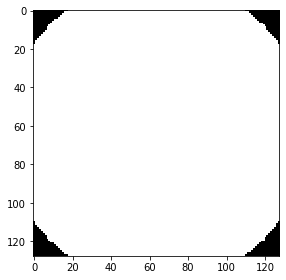

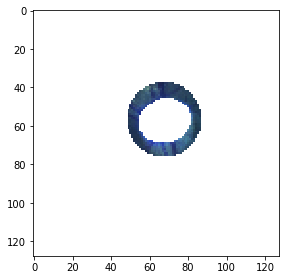

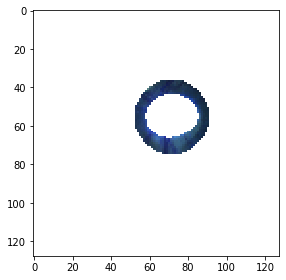

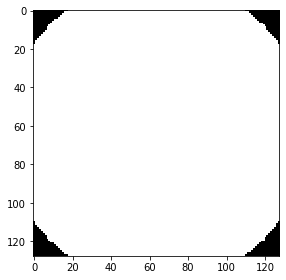

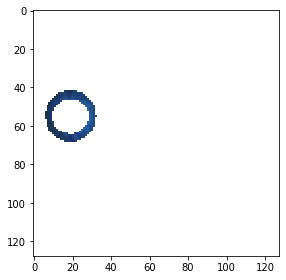

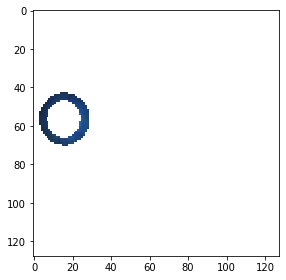

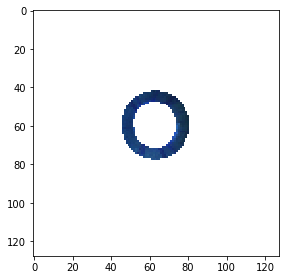

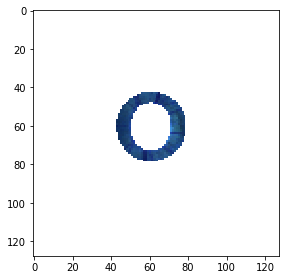

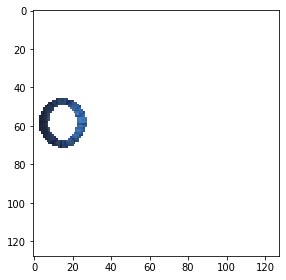

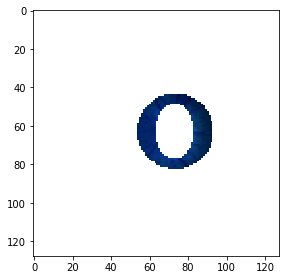

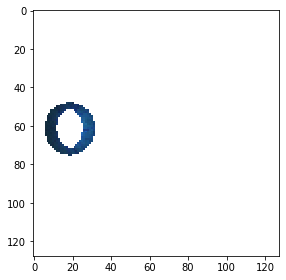

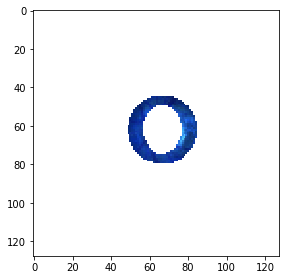

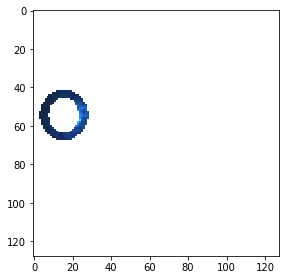

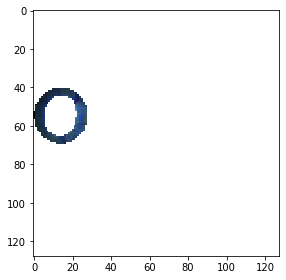

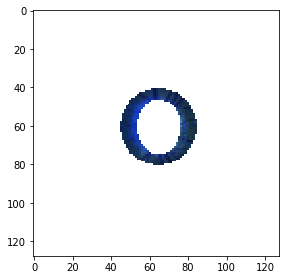

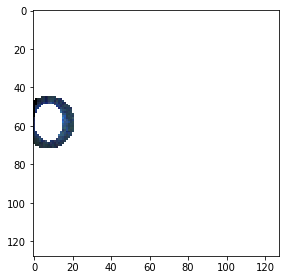

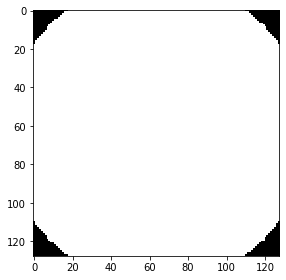

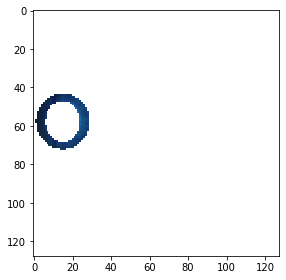

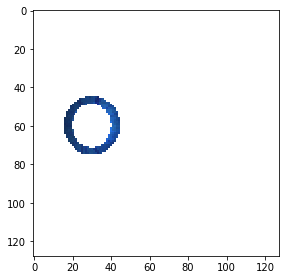

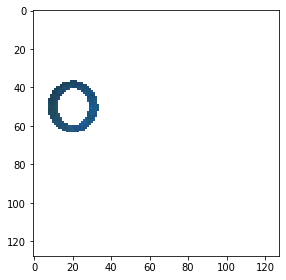

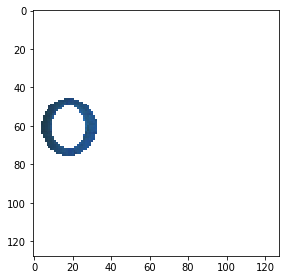

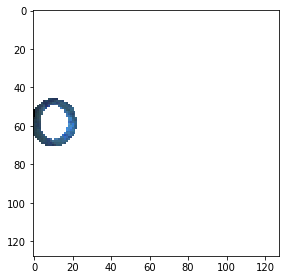

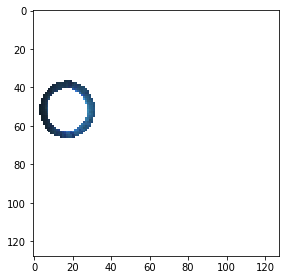

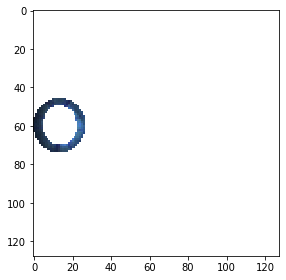

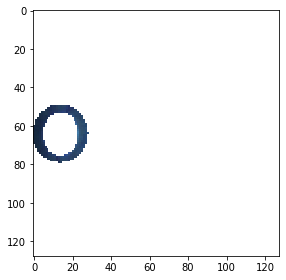

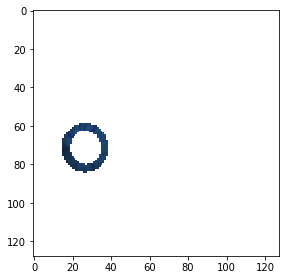

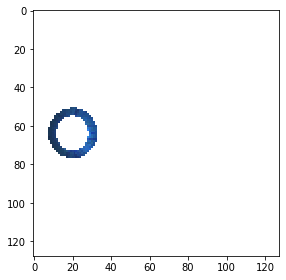

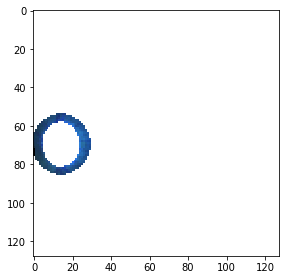

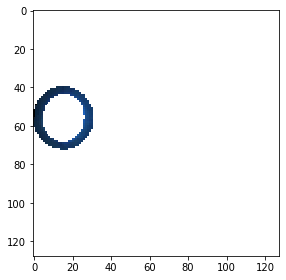

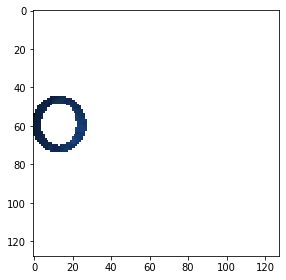

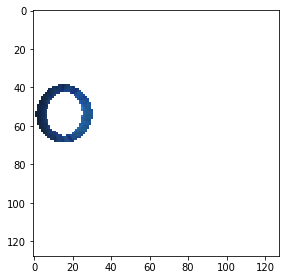

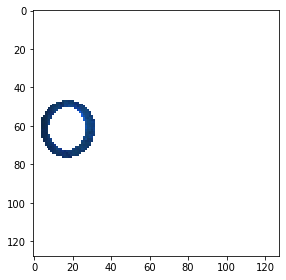

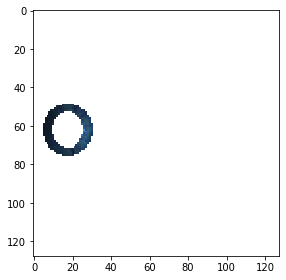

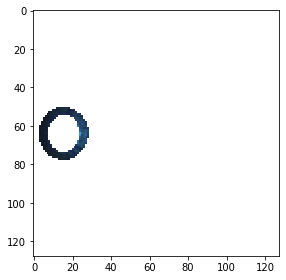

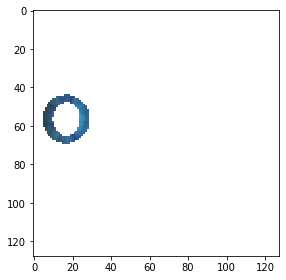

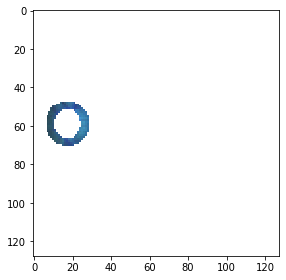

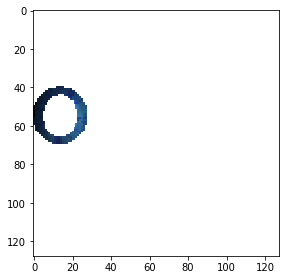

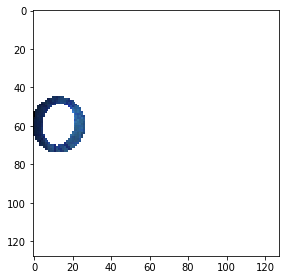

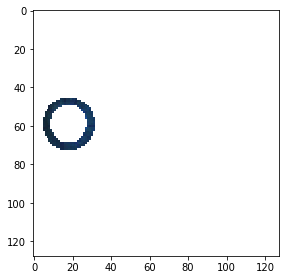

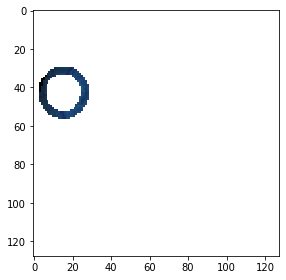

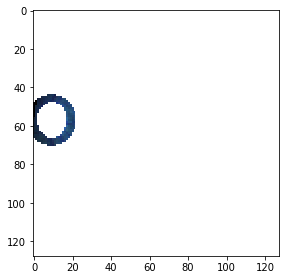

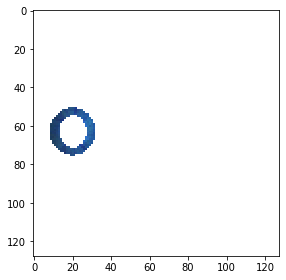

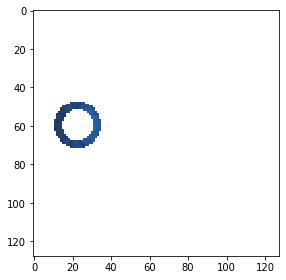

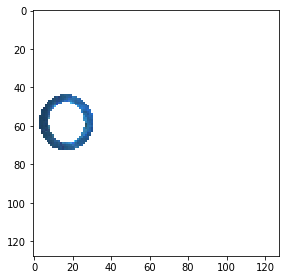

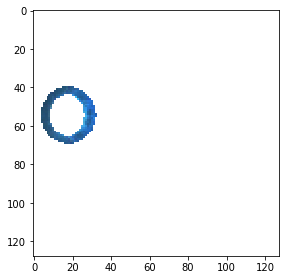

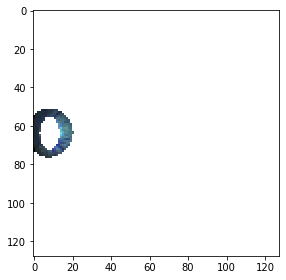

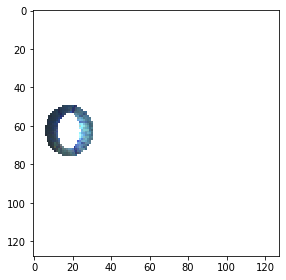

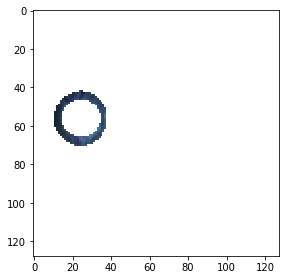

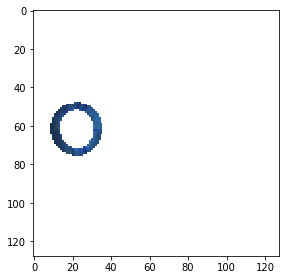

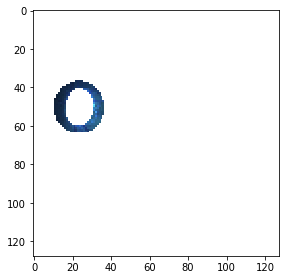

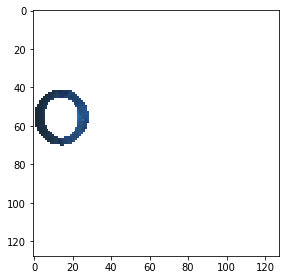

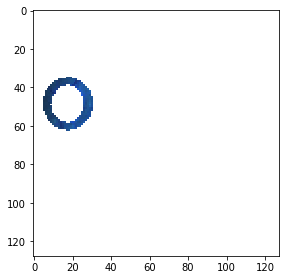

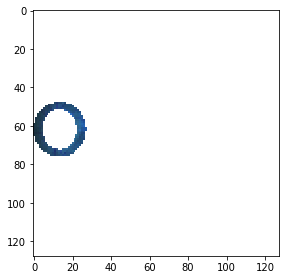

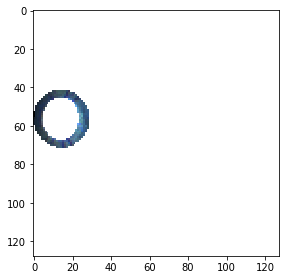

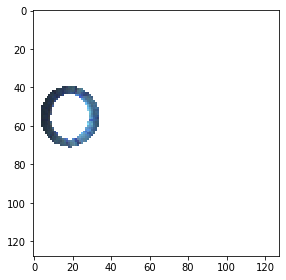

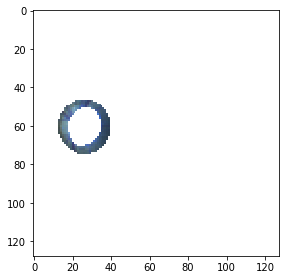

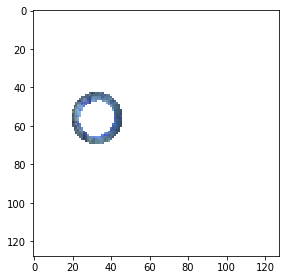

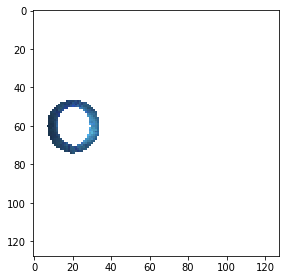

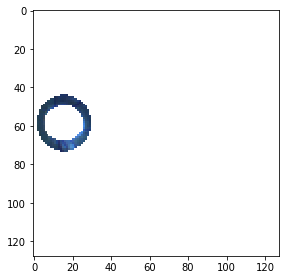

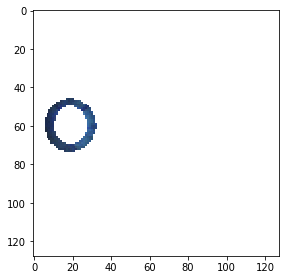

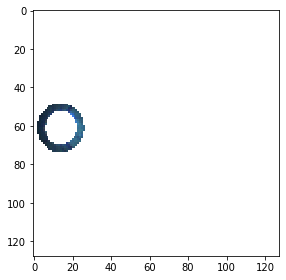

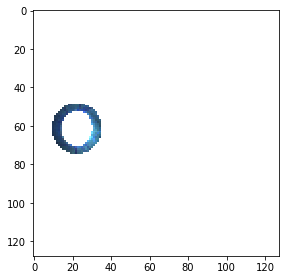

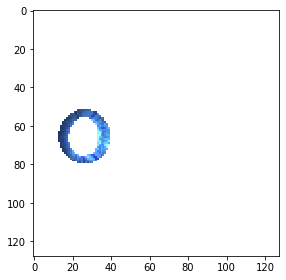

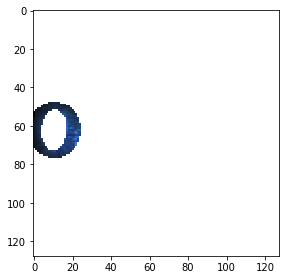

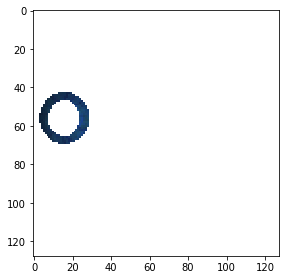

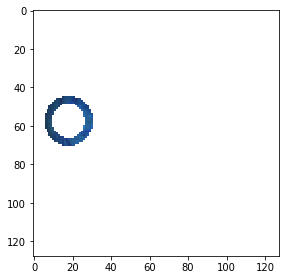

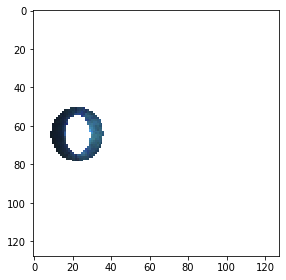

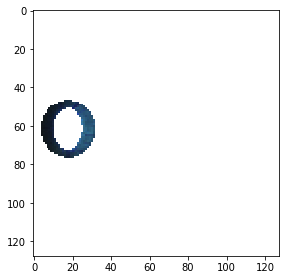

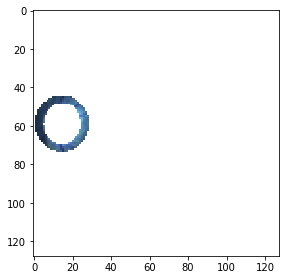

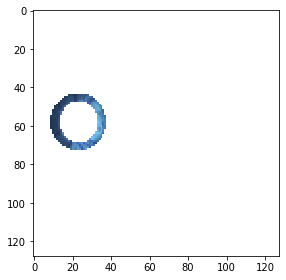

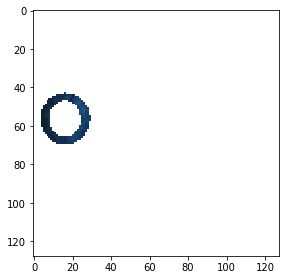

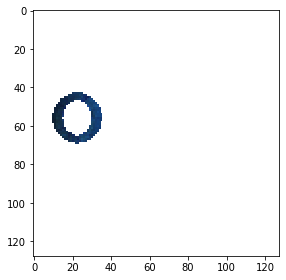

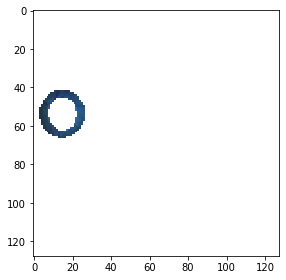

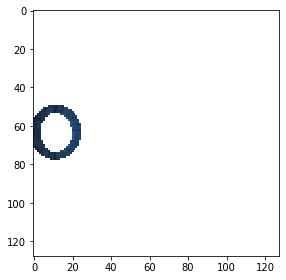

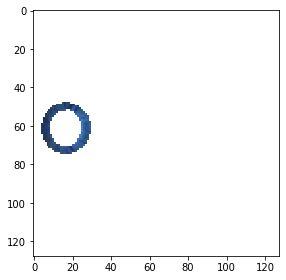

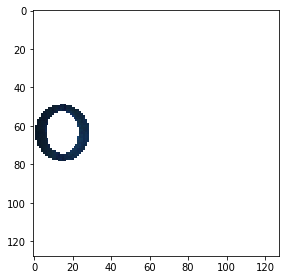

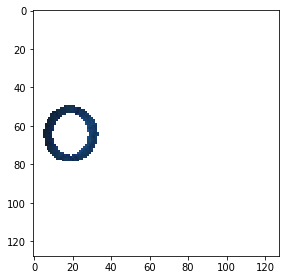

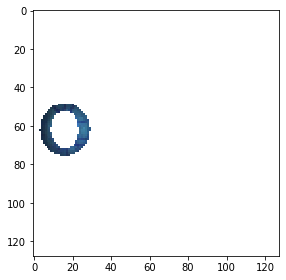

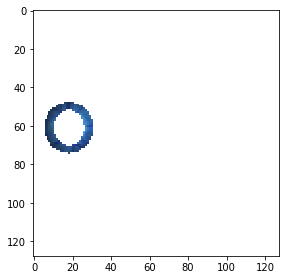

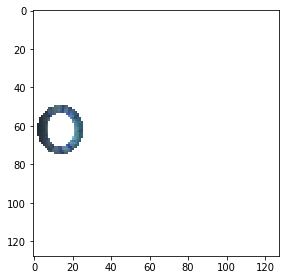

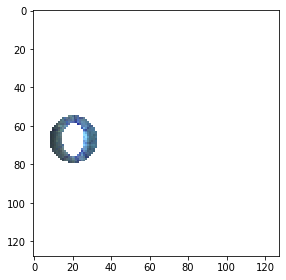

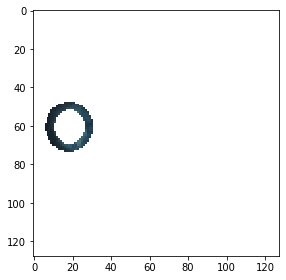

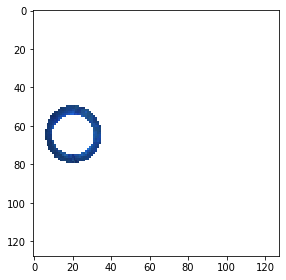

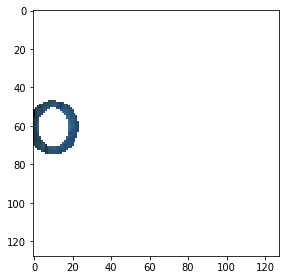

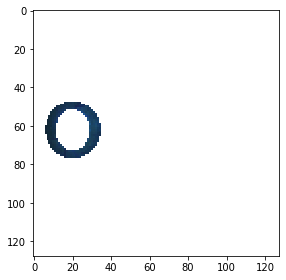

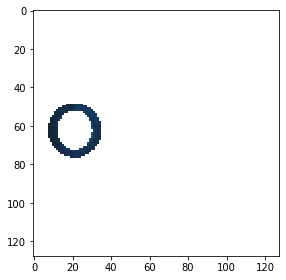

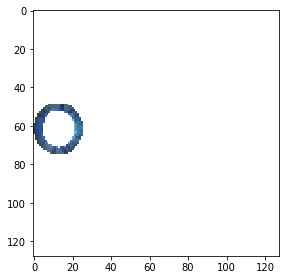

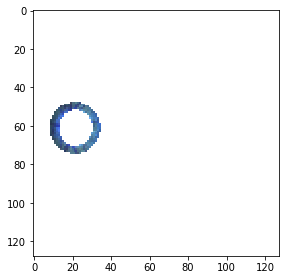

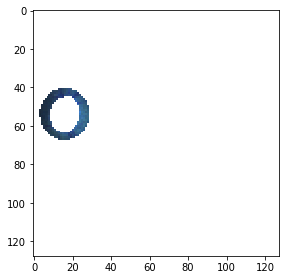

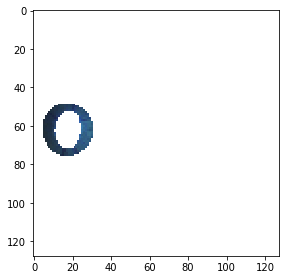

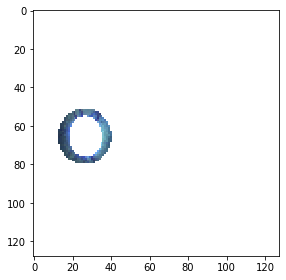

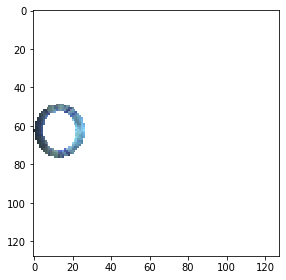

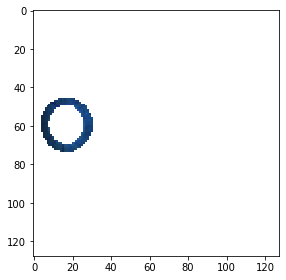

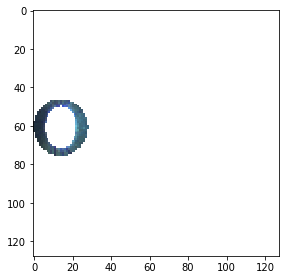

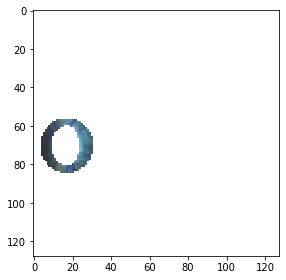

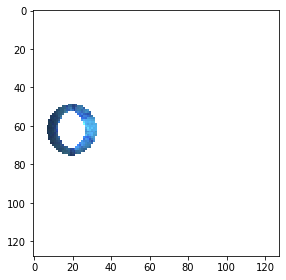

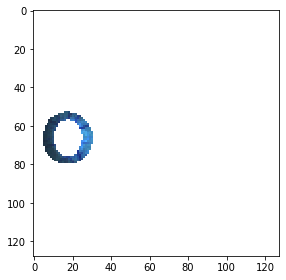

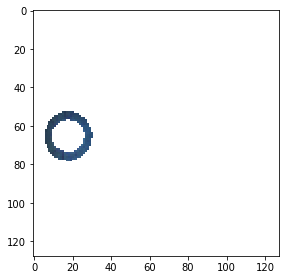

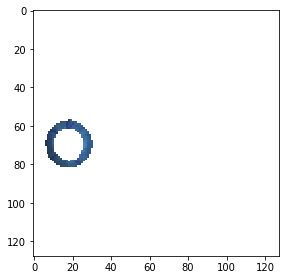

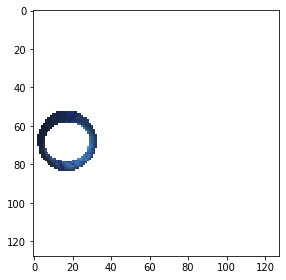

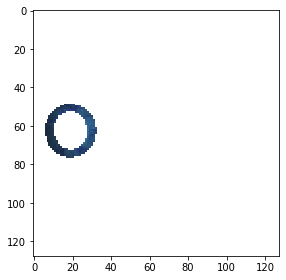

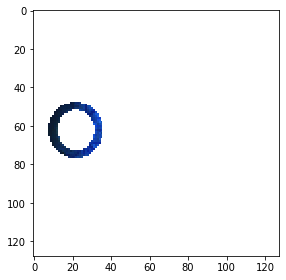

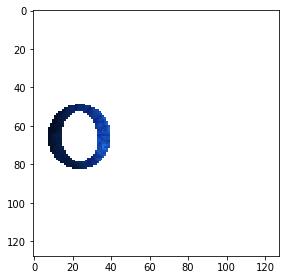

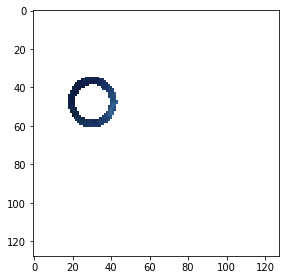

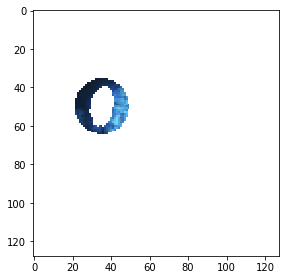

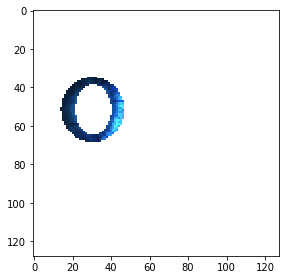

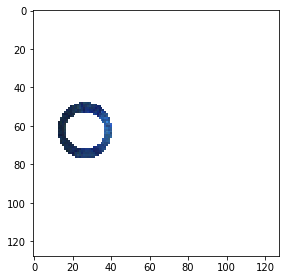

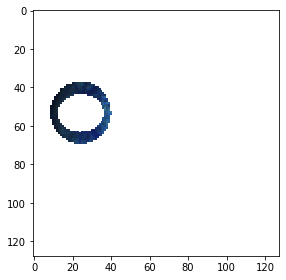

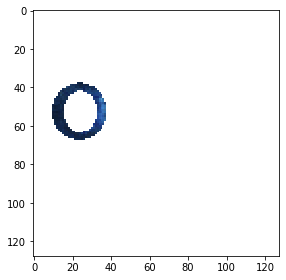

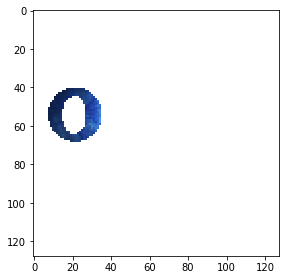

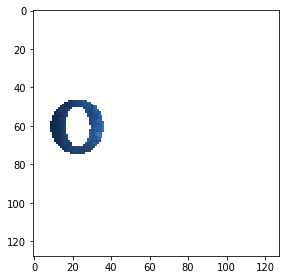

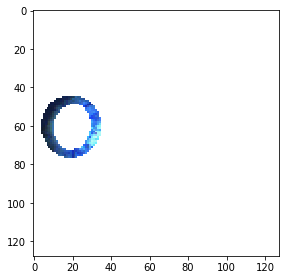

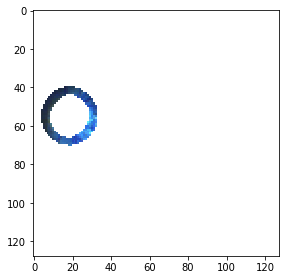

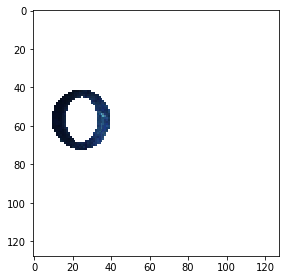

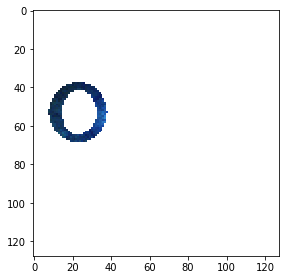

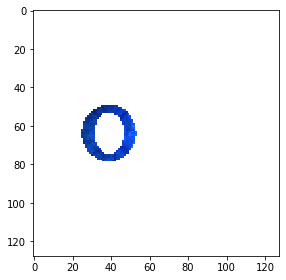

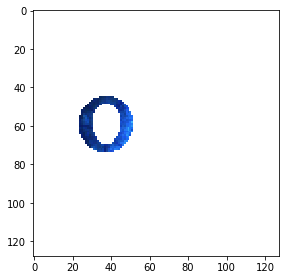

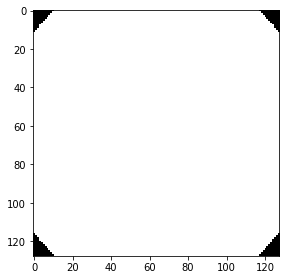

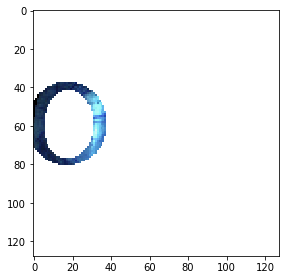

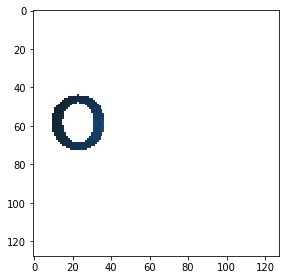

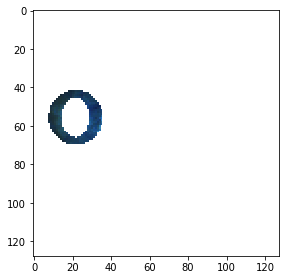

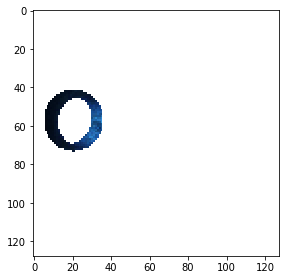

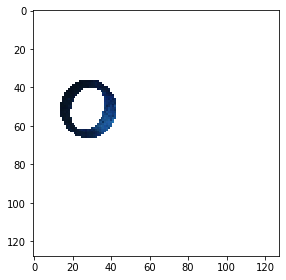

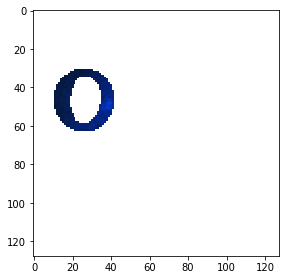

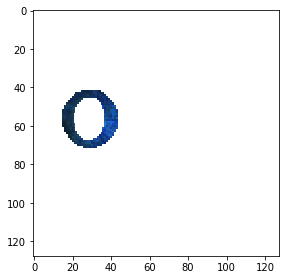

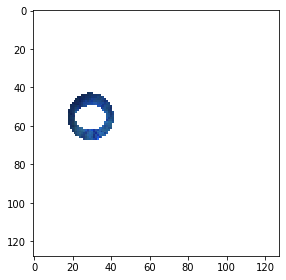

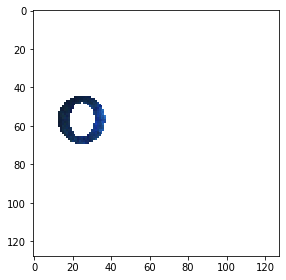

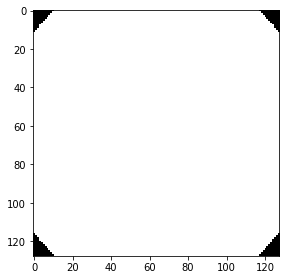

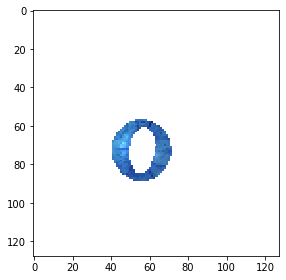

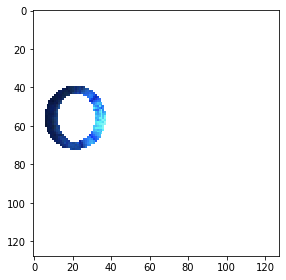

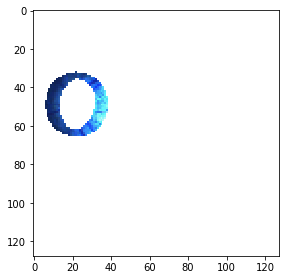

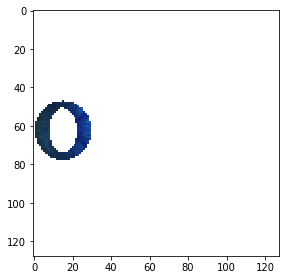

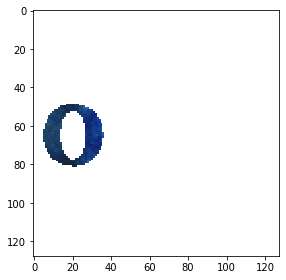

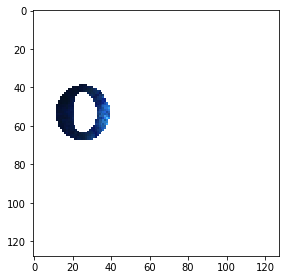

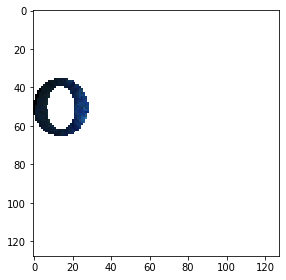

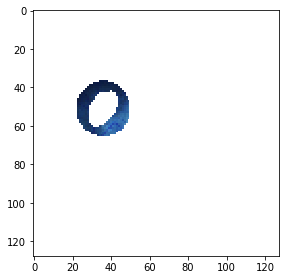

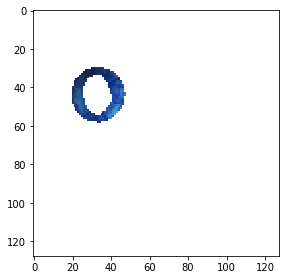

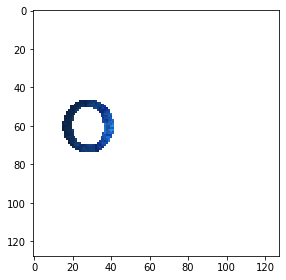

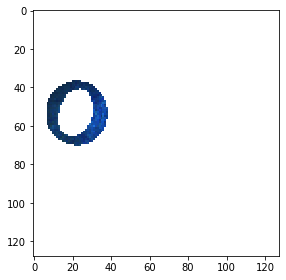

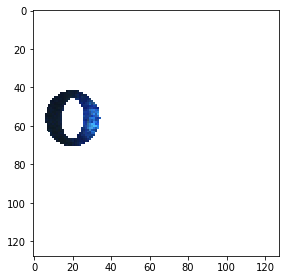

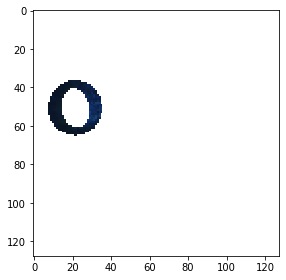

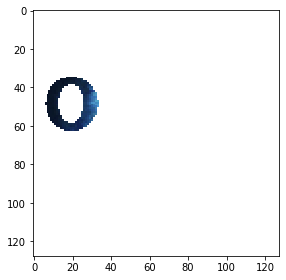

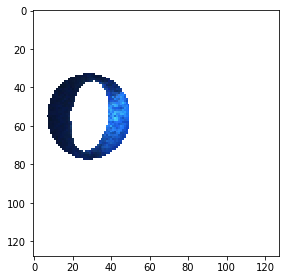

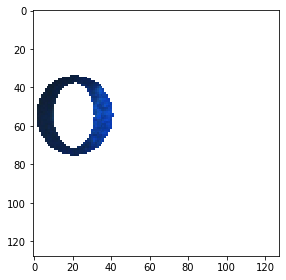

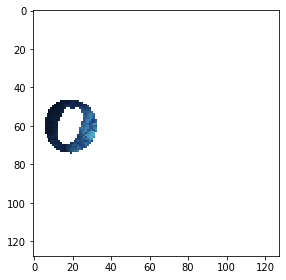

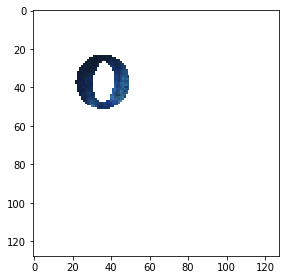

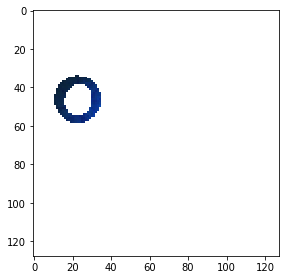

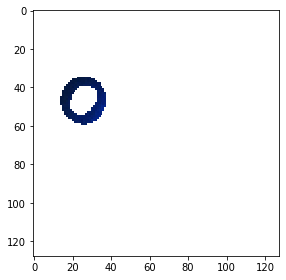

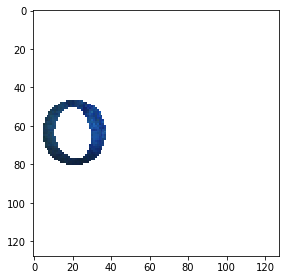

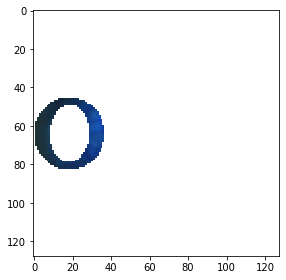

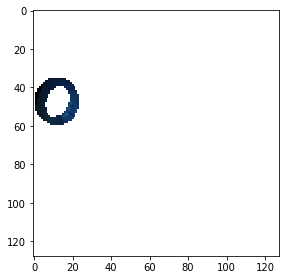

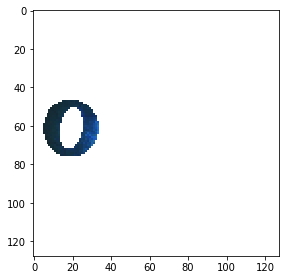

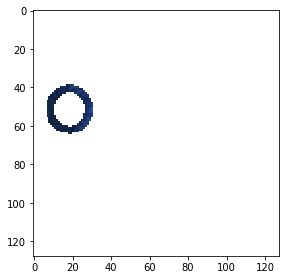

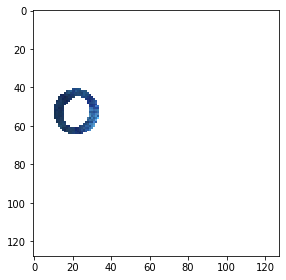

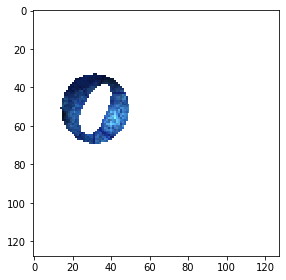

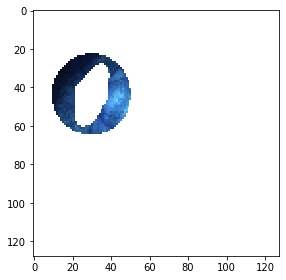

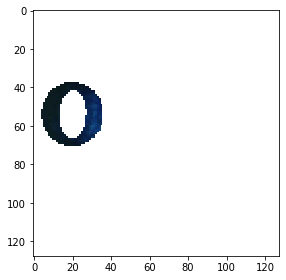

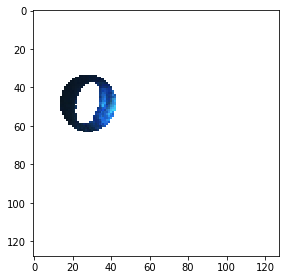

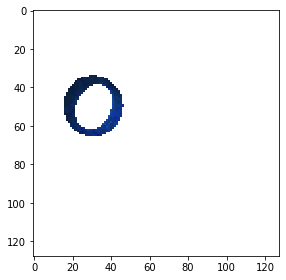

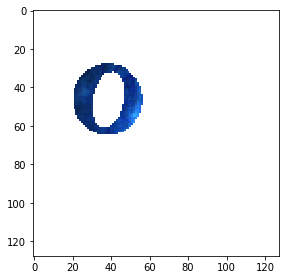

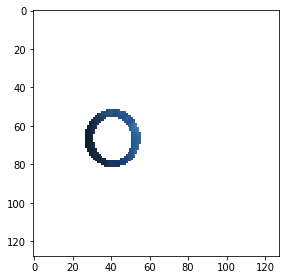

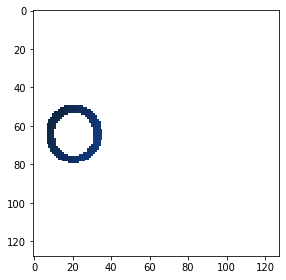

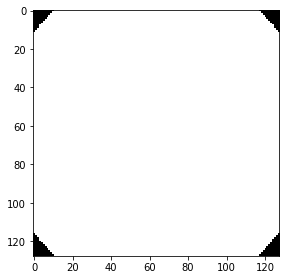

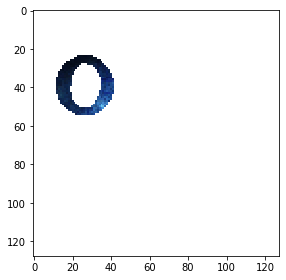

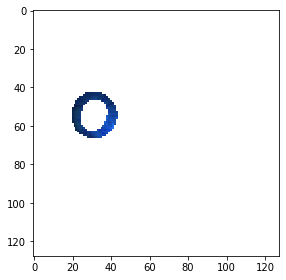

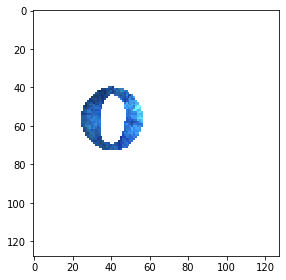

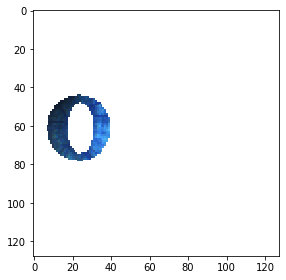

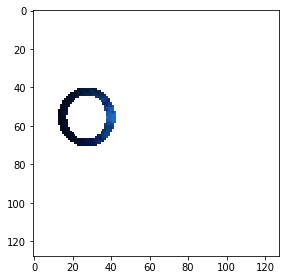

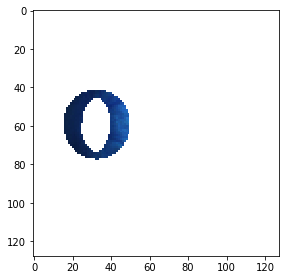

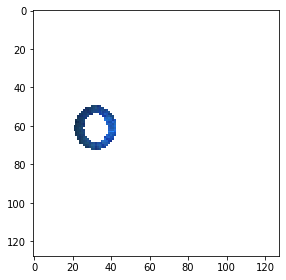

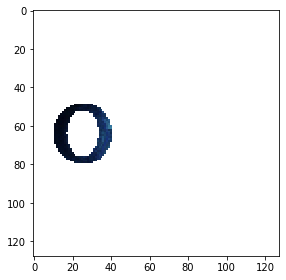

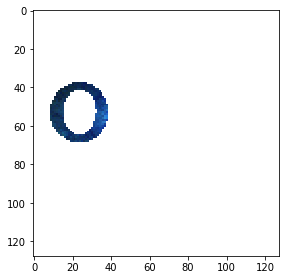

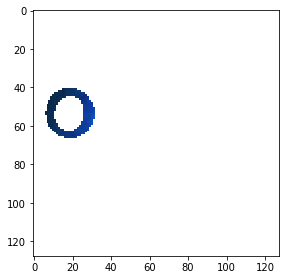

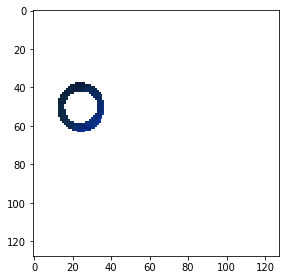

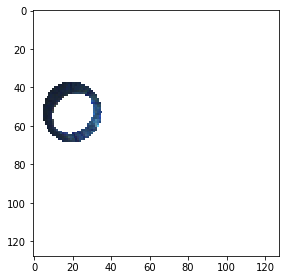

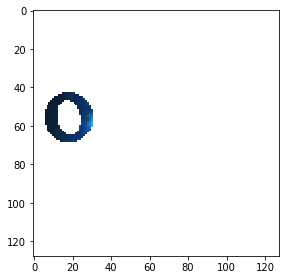

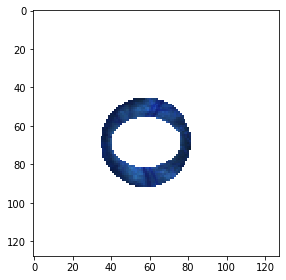

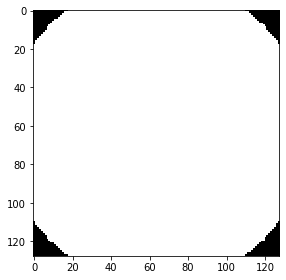

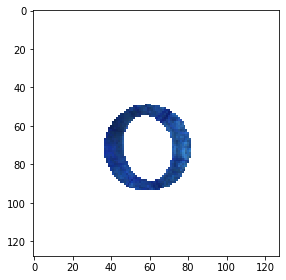

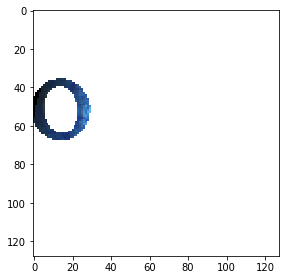

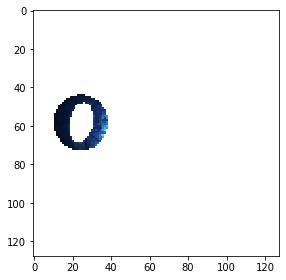

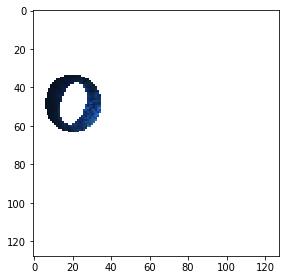

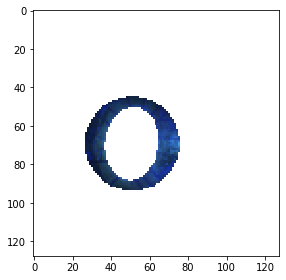

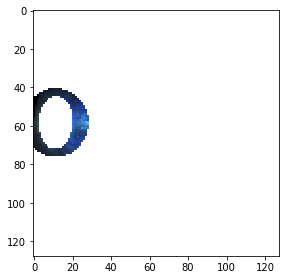

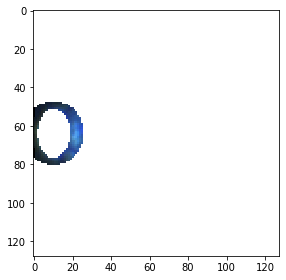

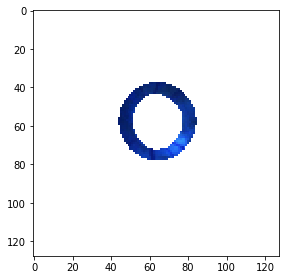

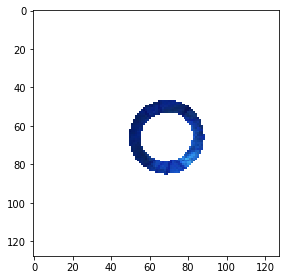

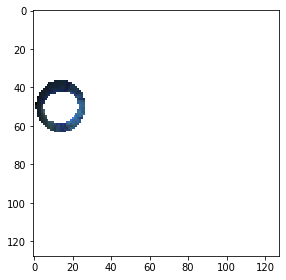

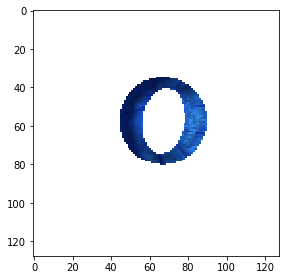

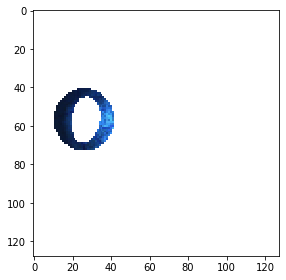

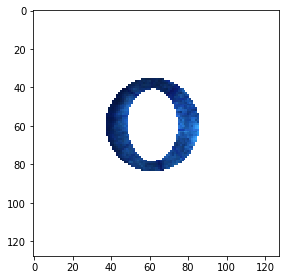

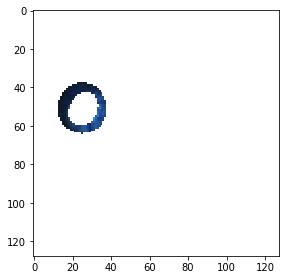

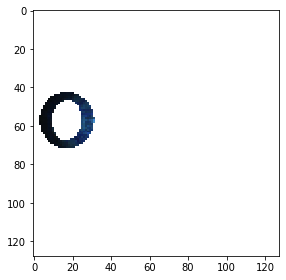

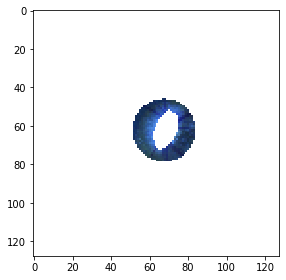

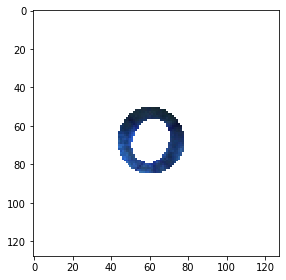

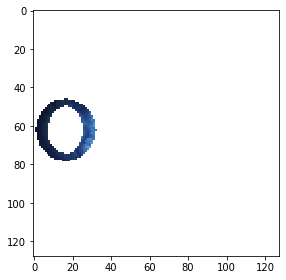

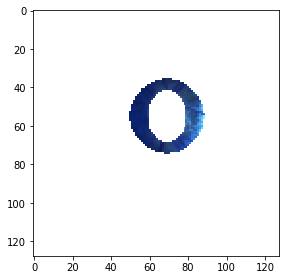

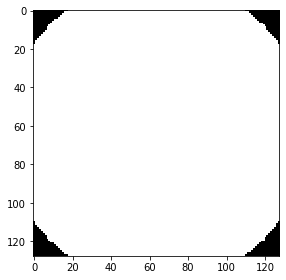

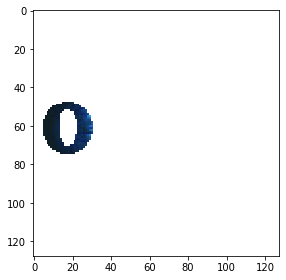

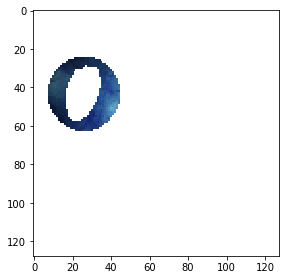

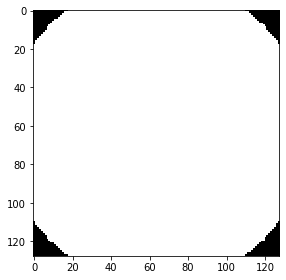

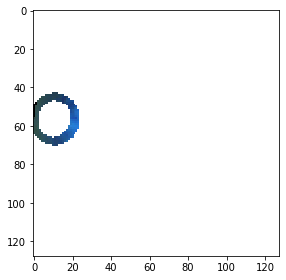

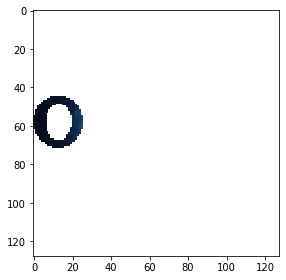

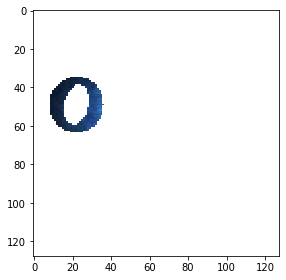

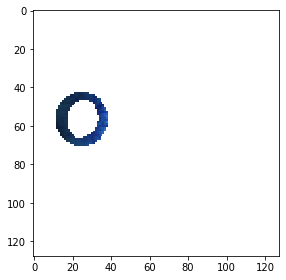

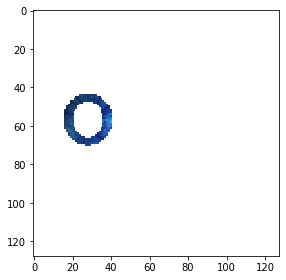

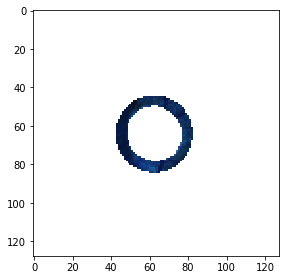

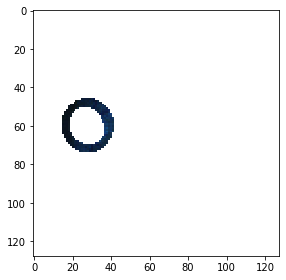

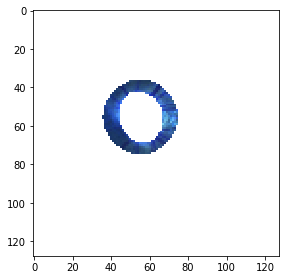

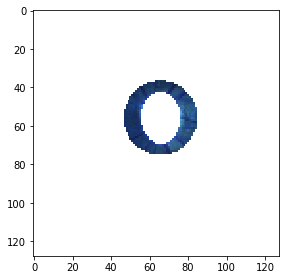

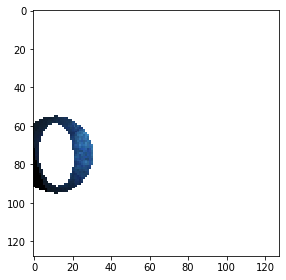

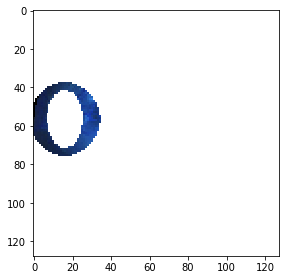

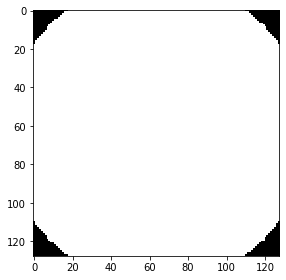

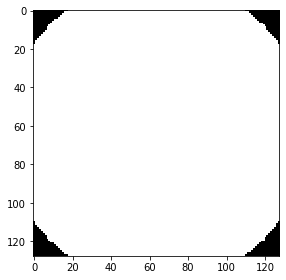

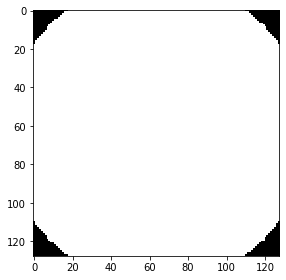

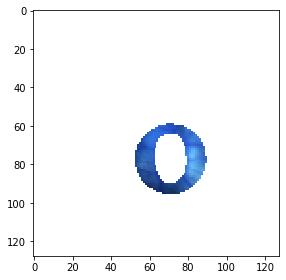

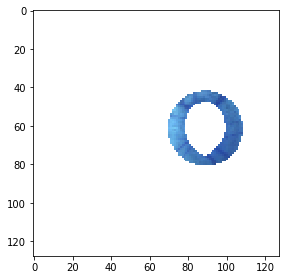

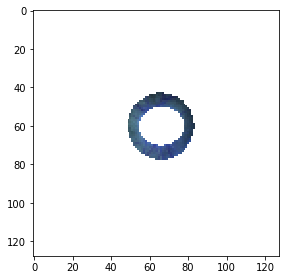

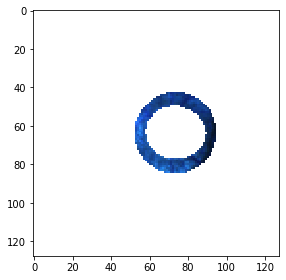

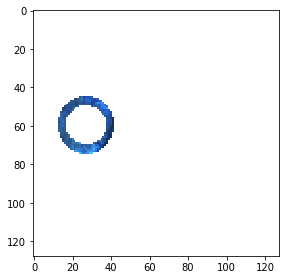

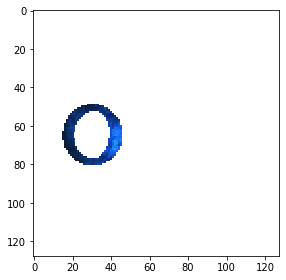

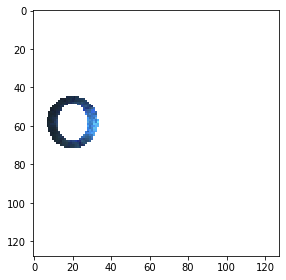

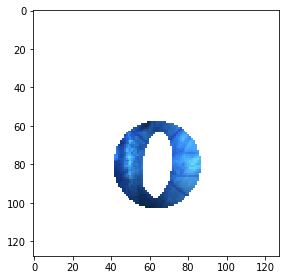

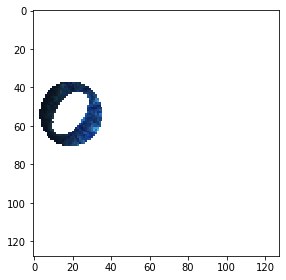

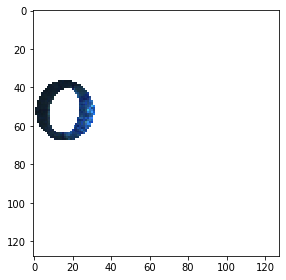

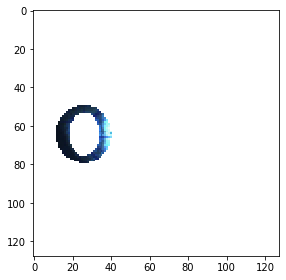

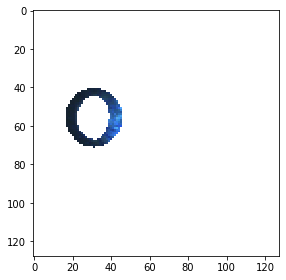

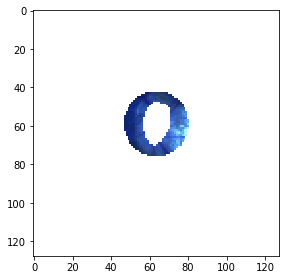

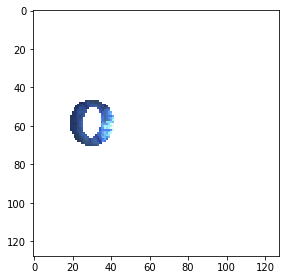

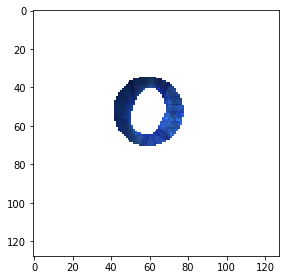

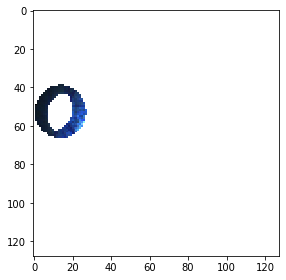

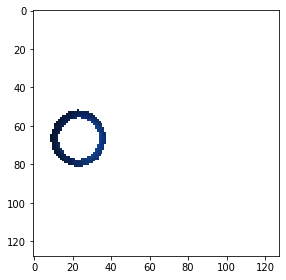

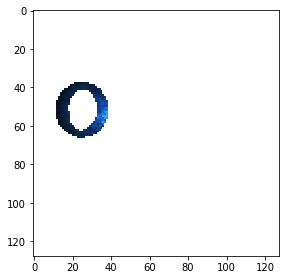

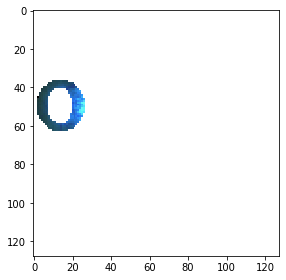

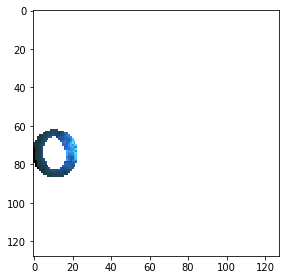

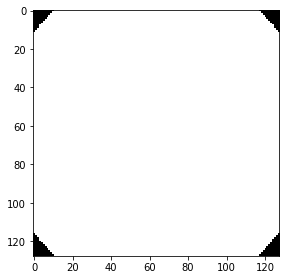

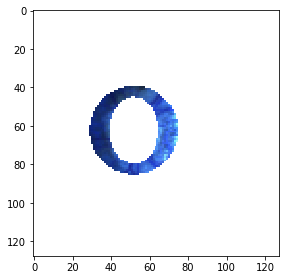

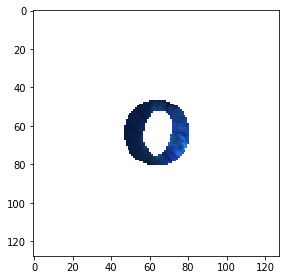

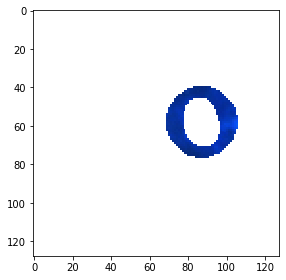

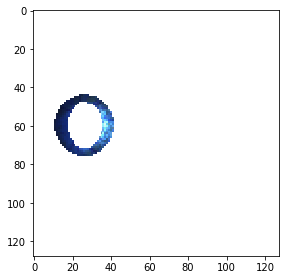

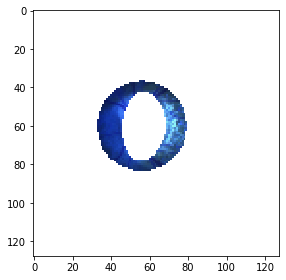

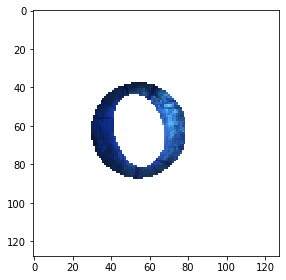

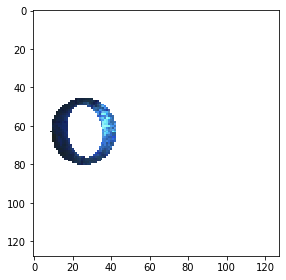

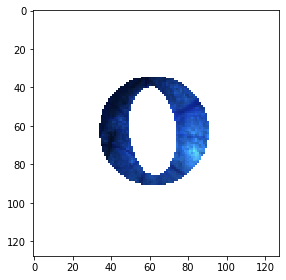

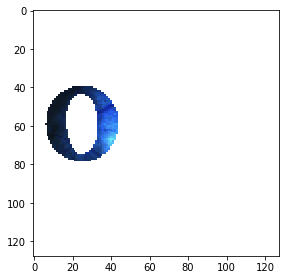

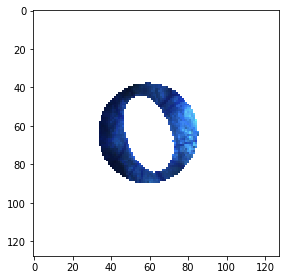

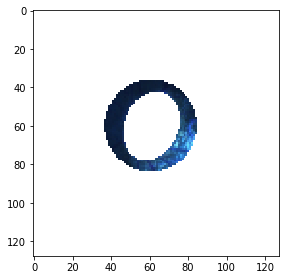

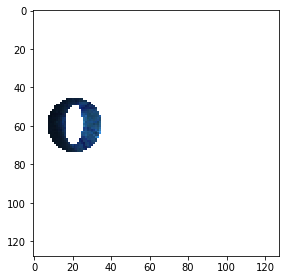

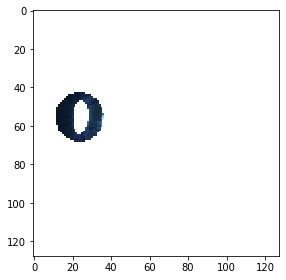

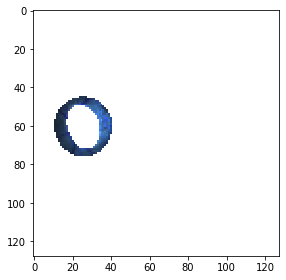

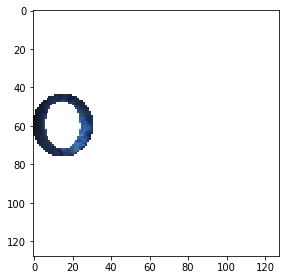

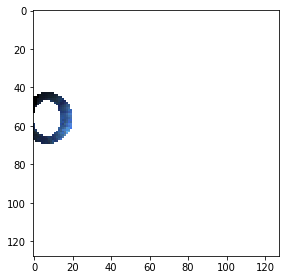

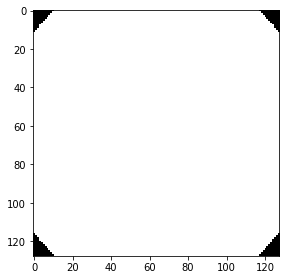

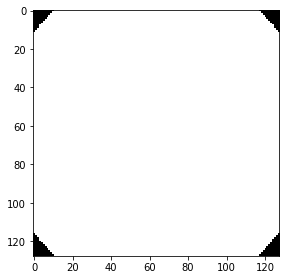

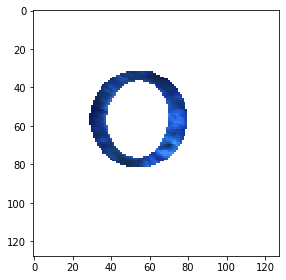

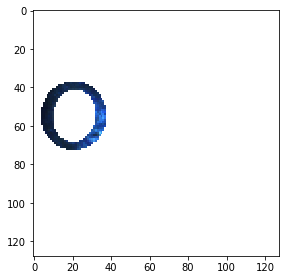

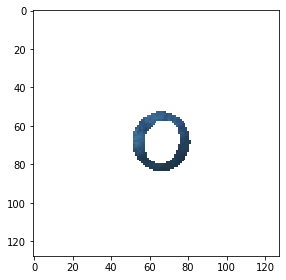

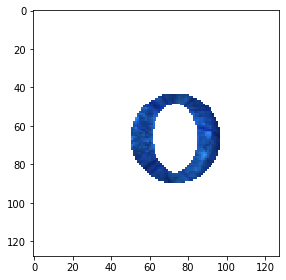

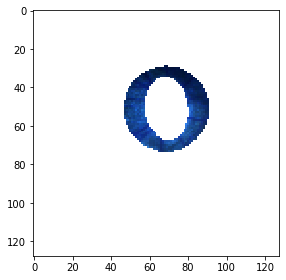

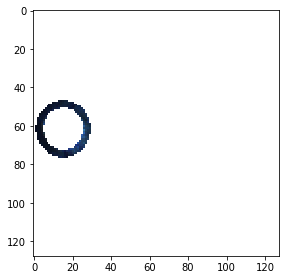

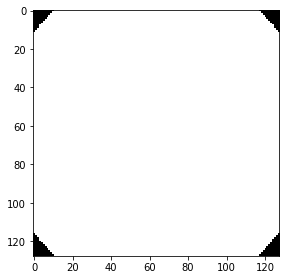

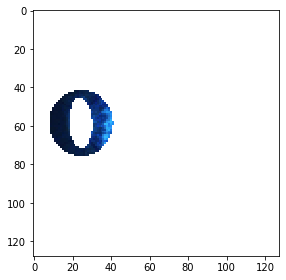

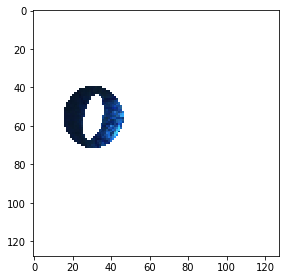

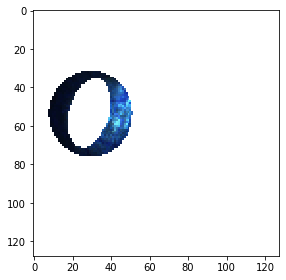

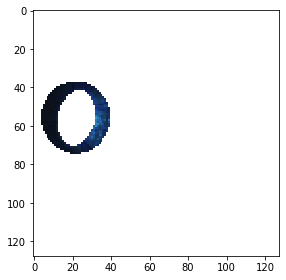

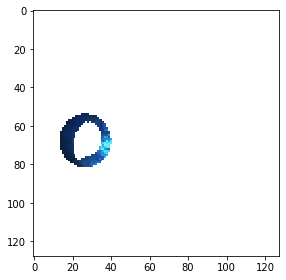

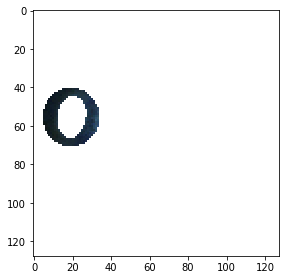

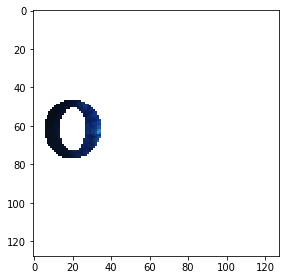

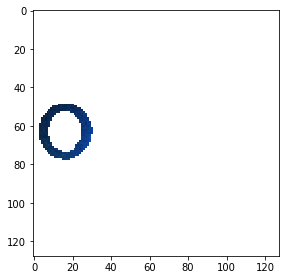

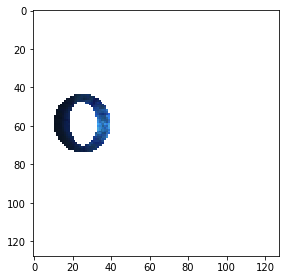

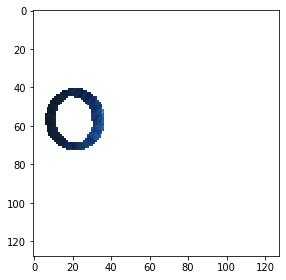

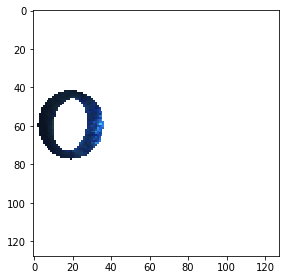

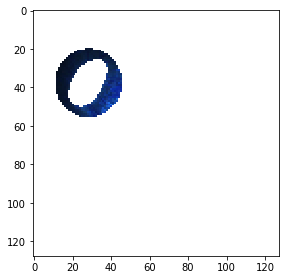

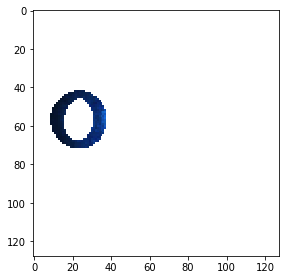

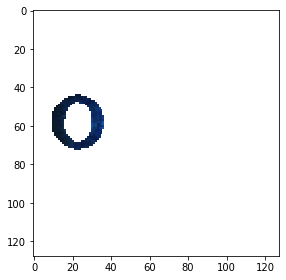

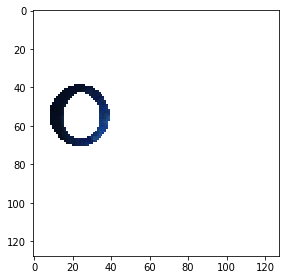

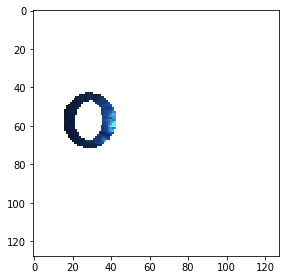

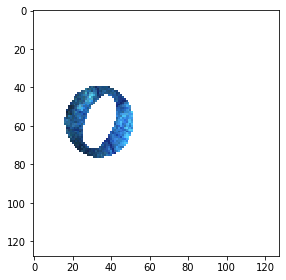

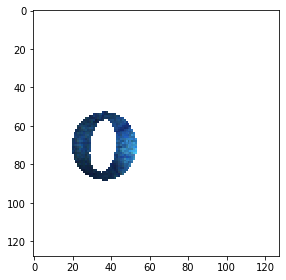

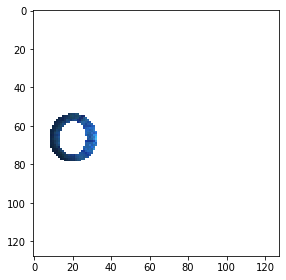

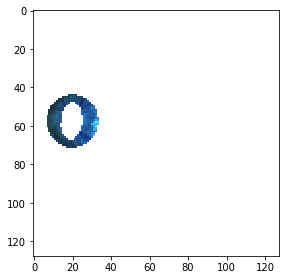

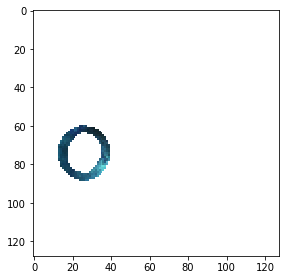

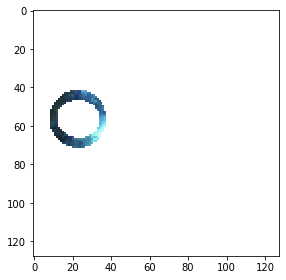

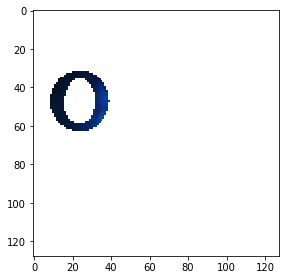

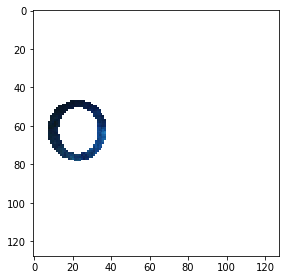

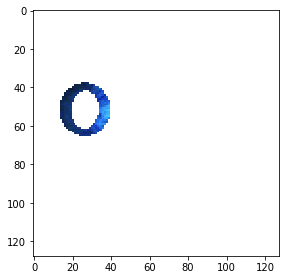

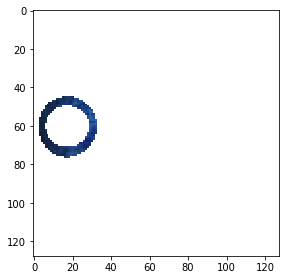

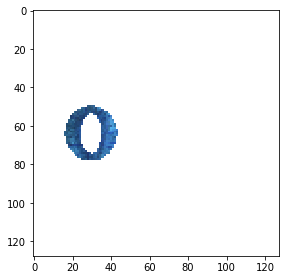

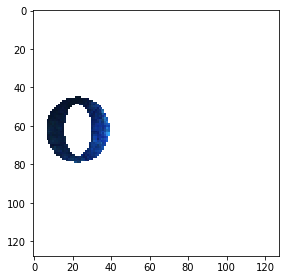

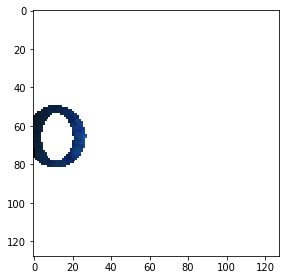

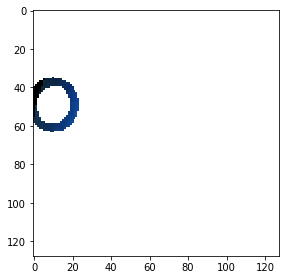

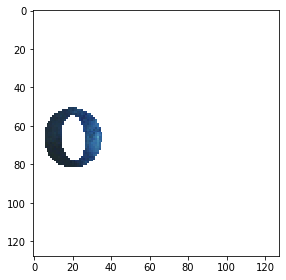

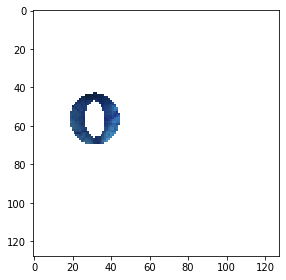

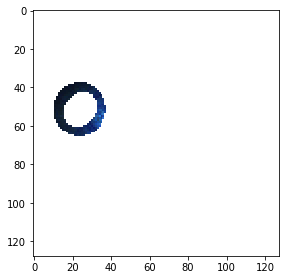

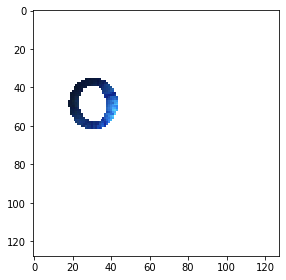

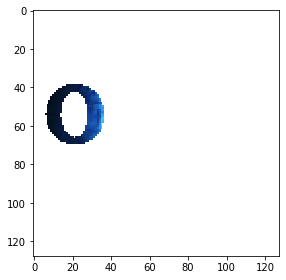

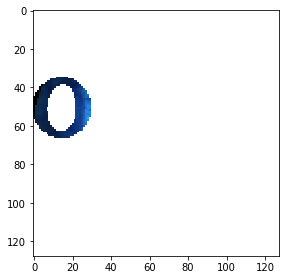

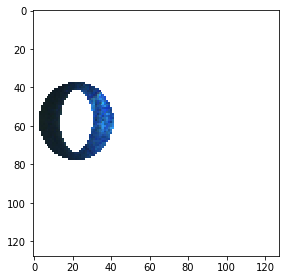

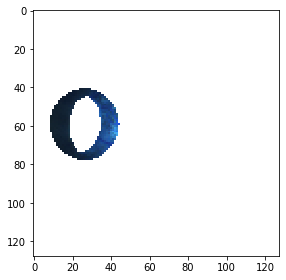

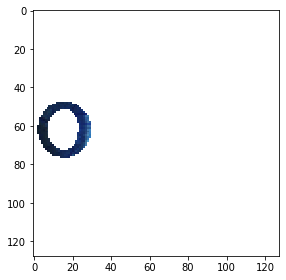

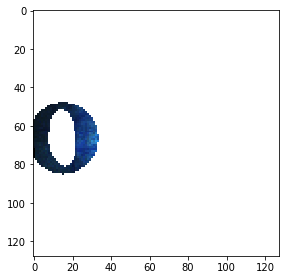

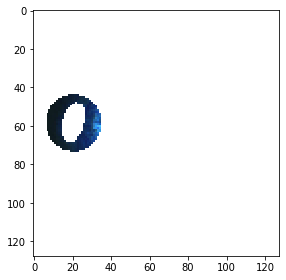

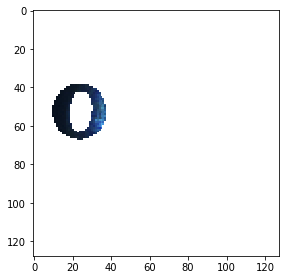

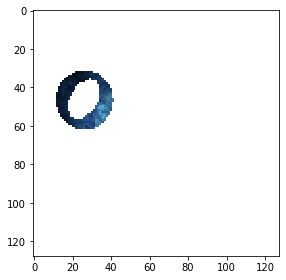

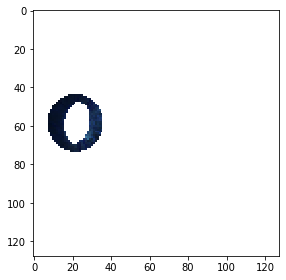

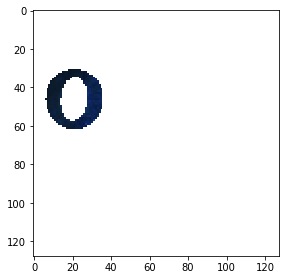

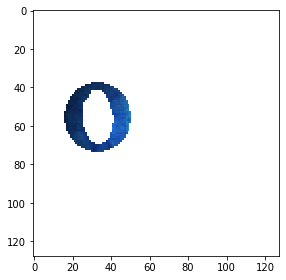

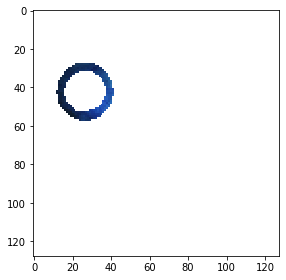

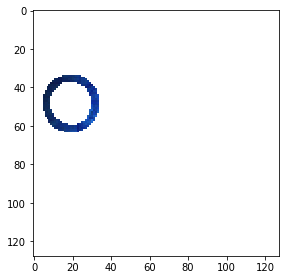

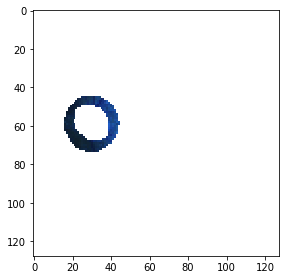

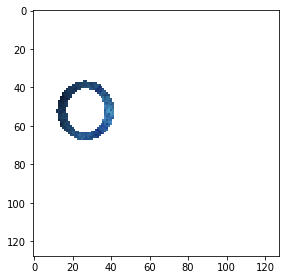

In [3]:
path = 'ODRadius'
train_pth = 'fundus/'
img_channels=3
for filename in train_ids:
    mId = filename.split('.')[0]
    img = cv2.imread('ODMasks/'+mId+'.bmp',0)
    imgmask=img
    imgmask=cv2.resize(imgmask,(128,128))
    rgbmask = cv2.imread('fundus/'+filename)
    rgbmask=cv2.resize(rgbmask,(128,128))
    for x in range (128):
        for y in range (128):
            if imgmask[y,x]==255 :
               # print('yes')
                rgbmask[y,x]=255
                #predimg[y,x]=255
           # elif fimg[y,x]<255 :
               # print("no")
            #    rgbimg[y,x]=rgbimg[y,x]
                #predimg[y,x]=255
   # img=cv2.resize(img,(128,128))
    #imm=cv2.imread('ODMasks/'+mId+'.bmp',0)
    #iml=cv2.imread('Atrophy/'+mId+'.bmp',0)
#     img = cv2.resize(img1, (400,400))
    
    ret,thresh = cv2.threshold(img,120,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2)
    cnt = contours[0]
    cnt = contours[0]
    M = cv2.moments(cnt)
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    radius = int(radius)
    radius += 20
    for i in range(1,110):
        img = cv2.circle(img,center,radius-i,(0,255,0),85)
    # print(radius)
    img2 = cv2.imread('fundus/'+filename,0)
   # img2=cv2.resize(img2,(128,128))
    #rgbimg=imread(train_pth+filename)[:,:,:img_channels]
    rgbimg = cv2.imread('fundus/'+filename)
    rgbimg=cv2.resize(rgbimg,(128,128))
   # print(rgbimg.shape)
    fimg = cv2.bitwise_or(img2,img)
    fimg=cv2.resize(fimg,(128,128))
    rgbmask = cv2.cvtColor(rgbmask,cv2.COLOR_RGB2GRAY)
    #fimg=cv2.bitwise_xor(fimg,rgbmask)
    for x in range (128):
        for y in range (128):
            if rgbmask[y,x]!=255 :
               # print('yes')
                fimg[y,x]=255
    
    #fimg=cv2.bitwise_or(fimg,iml)
    #fimg = cv2.cvtColor(fimg,cv2.COLOR_GRAY2RGB)
    for x in range (128):
        for y in range (128):
            if fimg[y,x]==255 :
               # print('yes')
                rgbimg[y,x]=255
                #imshow(rgbimg)
                #plt.show()
                #predimg[y,x]=255
           # elif fimg[y,x]<255 :
               # print("no")
            #    rgbimg[y,x]=rgbimg[y,x]
                #predimg[y,x]=255
    imshow(rgbimg)
    plt.show()
    cv2.imwrite(os.path.join(path ,mId+'.jpg'), rgbimg)
    
# cv2.imshow('detected circles',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()